## **Task-2: Prediction Using Unsupervised ML**
##### This regression task aims to predict the optimal number of clusters and visually depict them using the provided 'Iris' dataset
### Author- Sarven Lad

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [7]:
dataSet = pd.read_csv("Iris.csv")
print('DataSet import successfull')

DataSet import successfull


In [8]:
dataSet

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
dataSet.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


### Finding the optimum number of clusters for K-means

In [10]:
x = dataSet.iloc[:, [0, 1, 2, 3]].values

In [11]:

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print('k:',i ,"wcss:",kmeans.inertia_)

k: 1 wcss: 281831.5446666667
k: 2 wcss: 70581.38080000003
k: 3 wcss: 31320.71120000001
k: 4 wcss: 17793.590507045505
k: 5 wcss: 11424.765205784206
k: 6 wcss: 7961.650126873528
k: 7 wcss: 5922.7418560606075
k: 8 wcss: 4542.214812865497
k: 9 wcss: 3588.4878586601308
k: 10 wcss: 2933.4026488095237


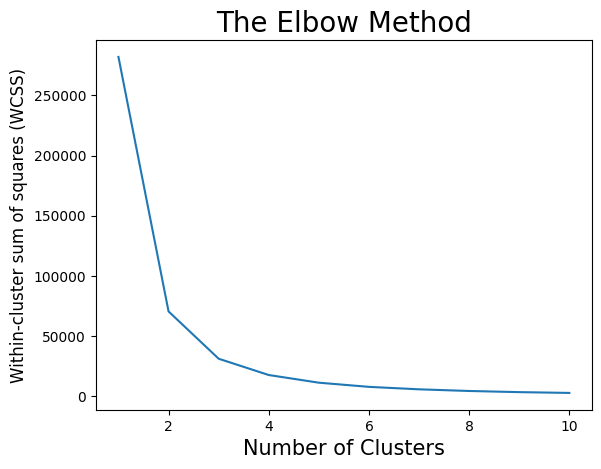

In [16]:
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', size=20)
plt.xlabel('Number of Clusters', size=15)
plt.ylabel('Within-cluster sum of squares (WCSS)', size=12) # Within cluster sum of squares
plt.show()

### Applying K-Means to Dataset

In [17]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Visualising Clusters

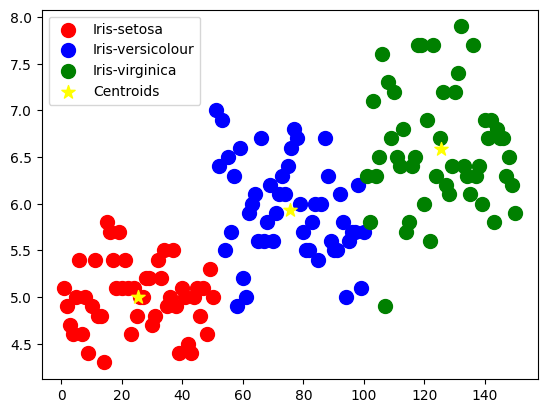

In [18]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', marker='*', label = 'Centroids')

plt.legend()